# Chapter 2
## The Vector

### 2.2.1 Representation of vectors using Python dictionaries

In [1]:
# Sometimes we will use lists, but often dictionaries.

# sparse representation of word document (WORDS => int counts)
{'on': 1, 'Spain': 1, 'in': 1, 'plain': 1, 'the': 2, 'mainly': 1, 'rain': 1, 'falls': 1}

{'Spain': 1,
 'falls': 1,
 'in': 1,
 'mainly': 1,
 'on': 1,
 'plain': 1,
 'rain': 1,
 'the': 2}

**Task 2.3.2:** In this task, we will represent a vector using a Python list.  
In Python, assign to the variable `L` a list of 2-element lists:  


`>>> L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]`

Plot these 2-vectors

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
matplotlib.rcParams['figure.figsize'] = (8, 8)

def plot_vectors_2d(vectors_2d, xlim=(0, 10), ylim=(0, 10)):
    plt.scatter([v[0] for v in vectors_2d], [v[1] for v in vectors_2d])
    plt.xlim(xlim)
    plt.ylim(ylim)

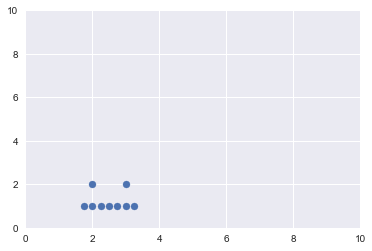

In [3]:
L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]
plot_vectors_2d(L)

## 2.4 Vector addition

### 2.4.1 Translation and vector addition

**Task 2.4.3:** Recall the list `L` defined in Task 2.3.2. Enter the procedure definition for 2-vector addition, and use a comprehension to plot the points obtained from `L` by adding `[1, 2]` to each:  

`>>> plot([add2(v, [1, 2]) for v in L], 4)`

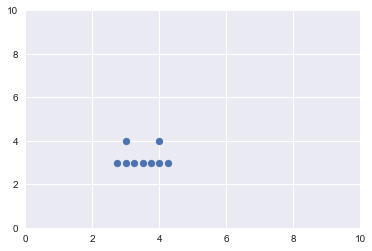

In [4]:
def add2(v, w):
    return [v[0] + w[0], v[1] + w[1]]

plot_vectors_2d([add2(v, [1, 2]) for v in L])

### 2.4.3 Vectors as arrows

**Exercise 2.4.6:** Draw a diagram representing the vector `[-2, 4]` using two different arrows.

In [5]:
def plot_arrows_2d(vec_2d, origins, **args):
    for origin in origins:
        plt.arrow(origin[0], origin[1], vec_2d[0], vec_2d[1], head_width = 0.5, **args)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

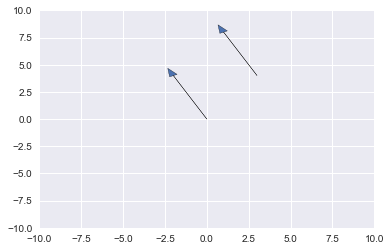

In [6]:
plot_arrows_2d([-2, 4], [[0, 0], [3, 4]])

**Exercise 2.4.7:** Draw a diagram illustrating `[-2, 4] + [1, 2]`

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_addition(vec_2d_1, vec_2d_2):
    plt.arrow(0, 0, vec_2d_1[0], vec_2d_1[1], head_width=0.5, linewidth=2, length_includes_head=True)
    plt.arrow(vec_2d_1[0], vec_2d_1[1], vec_2d_2[0], vec_2d_2[1], head_width=0.5, linewidth=2, length_includes_head=True)
    sum_vec_2d = add2(vec_2d_1, vec_2d_2)
    plt.arrow(0, 0, sum_vec_2d[0], sum_vec_2d[1], head_width=0.5, linestyle=':', linewidth=2, length_includes_head=True)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.show()

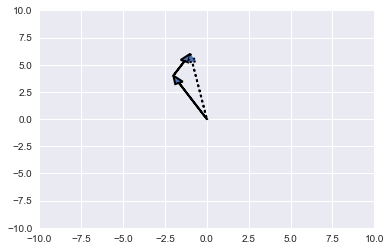

In [8]:
plot_addition([-2, 4], [1, 2])

## 2.5 Scalar-vector multiplication

**Task 2.5.4:** Plot the result of scaling the vectors in `L` by `0.5`, then plot the result of scaling them by `-0.5`.

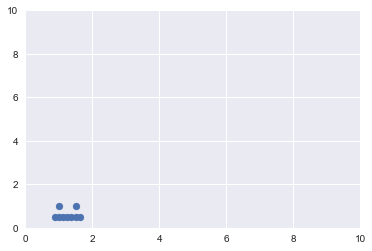

In [9]:
def scalar_vector_mult(vector, scalar):
    return [scalar * v for v in vector]

plot_vectors_2d([scalar_vector_mult(l, 0.5) for l in L])

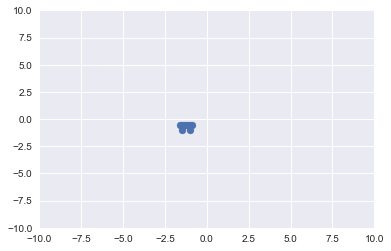

In [10]:
plot_vectors_2d([scalar_vector_mult(l, -0.5) for l in L], xlim=(-10, 10), ylim=(-10, 10))

### 2.5.1 Scaling arrows


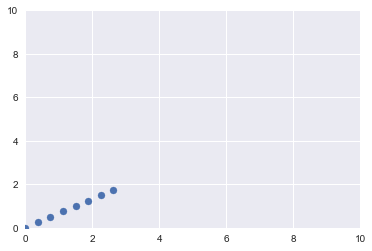

In [11]:
plot_vectors_2d([scalar_vector_mult([3, 2], i / 8) for i in range(8)])

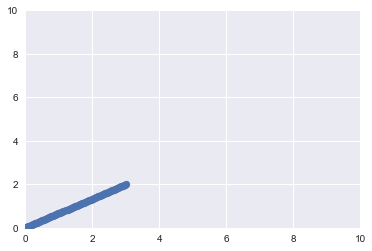

In [12]:
plot_vectors_2d([scalar_vector_mult([3, 2], i / 100) for i in range(101)])

The points of $\{\alpha v : \alpha \in \mathbb{R}\}$ form the infinite line through the origin and through $v$:

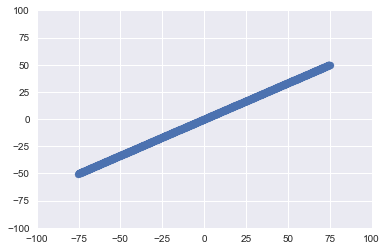

In [13]:
plot_vectors_2d([scalar_vector_mult([3, 2], i / 20) for i in range(-501, 501)], xlim=(-100, 100), ylim=(-100, 100))

**Review question:** _Express the line segment between the origin and another point through the origin as a set of scalar multiples of a single vector._

For a vector $\boldsymbol{v}$, $\{\alpha \boldsymbol{v} : \alpha \in \mathbb{R}, 0 \leq \alpha \leq 1\}$

**Review question:** _Express a line through the origin as the set of scalar multiples of a single vector._

For a vector $\boldsymbol{v}$, $\{\alpha \boldsymbol{v} : \alpha \in \mathbb{R}\}$

## 2.6 Combining vector addition and scalar multiplication

### 2.6.1 Line segments and lines that don't go through the origin

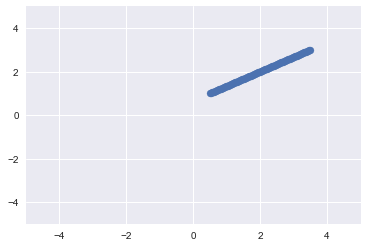

In [14]:
plot_vectors_2d([add2(scalar_vector_mult([3, 2], i / 100), [0.5, 1]) for i in range(101)], xlim=(-5, 5), ylim=(-5, 5))

**Exercise 2.6.1:** Given points `u = [2, 3]` and `v = [5, 7]` in $\mathbb{R}^{2}$, what is the point `w` such that the origin-to-`w` line segment can be translated to yield the `u`-to-`v` line segment? And what is the tranlsation vector that is applied to both endpoints?

In [15]:
u = [2, 3]
v = [5, 7]
w = add2(v, scalar_vector_mult(u, -1)) # equivalent to v - u
w # this is the answer

[3, 4]

The translation vector applied to the origin _and_ the `w` point is `u`:

In [16]:
add2([0, 0], u) # == u

[2, 3]

In [17]:
add2(w, u) # == v

[5, 7]

**Exercise 2.6.2:** Given a pair of points, $\boldsymbol{u} = [1, 4]$, $\boldsymbol{v} = [6, 3]$ in $\mathbb{R}^{2}$, write a mathematical expression giving the set of points making up the line segment between the points.

$\{\alpha(\boldsymbol{v} - \boldsymbol{u}) + \boldsymbol{u}: \alpha \in \mathbb{R}, 0 \leq \alpha \leq 1\}$

### 2.6.2 Distributive laws for scalar-vector multiplication and vactor addition

**Problem 2.6.6:** Prove the following proposition:  
$(\alpha + \beta) \boldsymbol{u} = \alpha \boldsymbol{u} + \beta \boldsymbol{u}$

We show that each entry of the left-hand side equals the corresponding entry of the right-hand side:  

For each element $k$ of the domain $D$, entry $k$ of $\boldsymbol{u}$ is $\boldsymbol{u}[k]$.  
By the distributive law of fields, $(\alpha + \beta)\boldsymbol{u}[k] = \alpha \boldsymbol{u}[k] + \beta \boldsymbol{u}[k]$.  
$QED$

### 2.6.3 First look at convex combinations

**Task 2.6.9:** Write a python procedure `segment(pt1, pt2)` that, given points represented as 2-element lists, returns a list of a hundred points spaced evenly along the line segment whose endpoints are the two points.  
    Plot the hundred points resulting when `pt1 = [3.5, 3]` and `pt2 = [0.5, 1]`

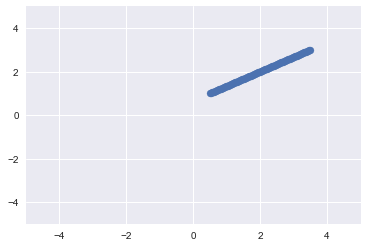

In [18]:
def segment(pt1, pt2):
    return [add2(scalar_vector_mult(add2(pt1, scalar_vector_mult(pt2, -1)), a / 100), pt2) for a in range(101)]
plot_vectors_2d(segment([3.5, 3], [0.5, 1]), xlim=(-5, 5), ylim=(-5, 5))

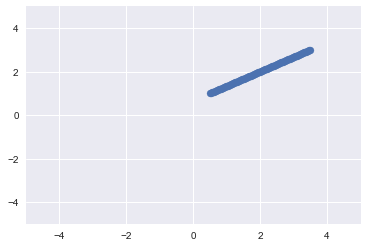

In [19]:
# equivalent, using "complex combinations"
def segment_complex_comb(pt1, pt2):
    return [add2(scalar_vector_mult(pt1, a / 100), scalar_vector_mult(pt2, (1 - a / 100))) for a in range(101)]
plot_vectors_2d(segment_complex_comb([3.5, 3], [0.5, 1]), xlim=(-5, 5), ylim=(-5, 5))

## 2.7 Dictionary-based representations of vectors

In [20]:
class Vec:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function

In [21]:
v = Vec({'A', 'B', 'C'}, {'A': 1})

for d in v.D:
    if d in v.f:
        print(v.f[d])

1


### 2.7.1 Setter ang getter

In [22]:
def setitem(v, d, val):
    v.f[d] = val
    
def getitem(v, d):
    return v.f[d] if d in v.f else 0

### 2.7.2 Scalar-vector multiplication

In [23]:
def scalar_mul(v, alpha):
    return Vec(v.D, {d: alpha * value for d, value in v.f.items()})

### 2.7.2 Addition

In [24]:
def add(u, v):
    return Vec(u.D, {d: getitem(u, d) + getitem(v, d) for d in u.D})

In [25]:
u = Vec(v.D, {'A':5., 'C':10.})
add(u, v).f

{'A': 6.0, 'B': 0, 'C': 10.0}

### 2.7.4 Vector negative, invertibility of vector addition, and vector subtraction

In [26]:
def neg(v):
    return scalar_mul(v, -1)

## 2.8 Vectors over $GF(2)$

### 2.8.2 All-or-nothing secret-sharing using $GF(2)$

**Problem 2.8.3:** Explain how to share an $n$-bit secret among _three_ TAs so that a cabal consisting of any _two_ of them learns nothing about the secret.

In [27]:
# hmm, can't figure this one out. Tricky since any number in GF(2) since addition of a vector by itself is 0 (erases information)

## 2.9 Dot-product

In [28]:
def list_dot(u, v):
    return sum([u_i * v_i for u_i, v_i in zip(u, v)])

list_dot([1, 2, 3], [2, 2, 2])

12

In [29]:
def dot_product_list(needle, haystack):
    return [list_dot(needle, haystack[i:i+len(needle)]) for i in range(len(haystack) - len(needle) + 1)]

dot_product_list([1, 2, 3], [1, 2, 3, 4, 5, 6])

[14, 20, 26, 32]

### 2.9.8 Algebraic properties of the dot-product

**Problem 2.9.23:** Prove the following proposition:  
$(\alpha \boldsymbol{u}) \cdot \boldsymbol{v} = \alpha (\boldsymbol{u} \cdot \boldsymbol{v})$

$
\begin{align}
(\alpha \boldsymbol{u}) \cdot \boldsymbol{v} & = (\alpha [u_{1}, u_{2}, ..., u_{n}]) \cdot \boldsymbol{v} \\
& = [\alpha u_{1}, \alpha u_{2}, ..., \alpha u_{n}] \cdot \boldsymbol{v} \\
& = [\alpha u_{1}, \alpha u_{2}, ..., \alpha u_{n}] \cdot [v_{1}, v_{2}, ..., v_{n}] \\
& = \alpha u_{1} v_{1} + \alpha u_{2} v_{2} + ... + \alpha u_{n} v_{n} \\
& = \alpha [u_{1} v_{1} + u_{2} v_{2} + ... + u_{n} v_{n}] \\
& = \alpha (\boldsymbol{u} \cdot \boldsymbol{v})
\end{align}
$

**Problem 2.9.24:** Show that $(\alpha \boldsymbol{u}) \cdot (\alpha \boldsymbol{v}) = \alpha (\boldsymbol{u} \cdot  \boldsymbol{v})$ is _not_ always true by giving a counterexample.

Consider the case where $\alpha = 2$, $\boldsymbol{u} = [1, 2]$ and $\boldsymbol{v} = [2, 3]$ Then,  
$
\begin{align}
(\alpha \boldsymbol{u}) \cdot (\alpha \boldsymbol{v}) & = (2 [1, 2]) \cdot (2 [2, 3]) \\
& = [2, 4] \cdot [4, 6] \\
& = 8 + 24 = 32
\end{align}
$

while  
$
\begin{align}
\alpha (\boldsymbol{u} \cdot \boldsymbol{v}) & = 2 ([1, 2] \cdot [2, 3]) \\
& = 2 (2 + 6) = 16 \neq 32
\end{align}
$

**Problem 2.9.26:** Show by giving a counterexample that $(\boldsymbol{u} + \boldsymbol{v}) \cdot (\boldsymbol{w} + \boldsymbol{x}) = \boldsymbol{u} \cdot \boldsymbol{w} + \boldsymbol{v} \cdot \boldsymbol{x}$ is _not_ true

Let $\boldsymbol{u} = \boldsymbol{v} = \boldsymbol{w} = \boldsymbol{x} = [1]$ Then,  
$
\begin{align}
(\boldsymbol{u} + \boldsymbol{v}) \cdot (\boldsymbol{w} + \boldsymbol{x}) & = ([1] + [1]) \cdot ([1] + [1]) \\
& = [2] \cdot [2] \\
& = 4
\end{align}
$

while  
$
\begin{align}
\boldsymbol{u} \cdot \boldsymbol{w} + \boldsymbol{v} \cdot \boldsymbol{x} & = [1] \cdot [1] + [1] \cdot [1] \\
& = 1 + 1 = 2 \neq 4
\end{align}
$

### 2.9.9 Attacking the simple authentication scheme, revisited

**Problem 2.9.29:** Eve knows the following challenges and responses:  

|challenge|response|
|---------|--------|
|110011   | 0      |
|101010   | 0      |
|111011   | 1      |
|001100   | 1      |

Show how she can derive the right responses to the challenges `011101` and `000100`.

Using the distributive property, we can express each challenge as the sum of previous challenges to find the correct response:  

$\begin{align}
011101 \cdot \boldsymbol{x} & = (101010 + 111011 + 001100) \cdot \boldsymbol{x} \\
& = 101010 \cdot \boldsymbol{x} + 111011 \cdot \boldsymbol{x} + 001100 \cdot \boldsymbol{x} \\
& = 0 + 1 + 1 \\
& = 0
\end{align}$

$\begin{align}
000100 \cdot \boldsymbol{x} & = (110011 + 111011 + 001100) \cdot \boldsymbol{x} \\
& = 110011 \cdot \boldsymbol{x} + 111011 \cdot \boldsymbol{x} + 001100 \cdot \boldsymbol{x} \\
& = 0 + 1 + 1 \\
& = 0
\end{align}$

### 2.10.3 Using `Vec`s

In [30]:
from vec import Vec

In [31]:
v = Vec({1, 2, 3}, {1: 1, 2: 2, 3: 3})
v

Vec({1, 2, 3},{1: 1, 2: 2, 3: 3})

### 2.11.2 Backward substitution

**Exercise 2.11.3:** Solve the following system:  
$\begin{align}
1x_{1} - 3x_{2} - 2x_{3} & = 7\\
         2x_{2} - 4x_{3} & = 4\\
                -10x_{3} & = 12\\
\end{align}$

$\begin{align}
x_3 &= -6/5\\
x_2 &= (4x_3 + 4)/2 = (-24/5 + 4)/2 = -24/10 + 2 = -2/5\\
x_1 &= 7 + 3x_2 + 2x_3 = 7 - 6/5 - 12/5 = 17/5
\end{align}$

### 2.11.3 First implementation of backward substitution

**Exercise 2.11.4:** Enter `triangular_solve_n` into Python and try it out on the example system:  
$
[1, 0.5, -2, 4] \cdot \boldsymbol{x} = -8\\
[0,   3,  3, 2] \cdot \boldsymbol{x} = 3\\
[0,   0,  1, 5] \cdot \boldsymbol{x} = -4\\
[0,   0,  0, 2] \cdot \boldsymbol{x} = 6
$

_Note that this requires implementing the empty methods in `Vec`._

In [32]:
from vecutil import zero_vec

def triangular_solve_n(rowlist, b):
    D = rowlist[0].D
    n = len(D)
    assert D == set(range(n))
    x = zero_vec(D)
    for i in reversed(range(n)):
        x[i] = (b[i] - rowlist[i] * x) / rowlist[i][i]
    return x

In [33]:
from vecutil import list2vec

lists = [[1, 0.5, -2, 4],
         [0,   3,  3, 2],
         [0,   0,  1, 5],
         [0,   0,  0, 2]]

rowlist = [list2vec(l) for l in lists]
triangular_solve_n(rowlist, [-8, 3, -4, 6])

Vec({0, 1, 2, 3},{3: 3.0, 2: -19.0, 1: 18.0, 0: -67.0})

In [34]:
def triangular_solve(rowlist, label_list, b):
    D = rowlist[0].D
    x = zero_vec(D)
    for j in reversed(range(len(D))):
        c = label_list[j]
        row = rowlist[j]
        x[c] = (b[j] - x * row) / row[c]
    return x


## 2.12 Lab: Comparing the voting records using dot-product

### 2.12.2 Reading in the file

In [35]:
f = open('voting_record_dump109.txt')
l = list(f)
l

['Akaka D HI -1 -1 1 1 1 -1 -1 1 1 1 1 1 1 1 -1 1 1 1 -1 1 1 1 1 1 -1 1 -1 -1 1 1 1 1 1 1 0 0 1 -1 -1 1 -1 1 -1 1 1 -1\n',
 'Alexander R TN 1 1 1 1 1 1 1 1 1 -1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1\n',
 'Allard R CO 1 1 1 1 1 1 1 1 1 -1 1 -1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n',
 'Allen R VA 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n',
 'Baucus D MT -1 1 1 1 1 1 -1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 -1 1 -1 1 1 0 1 1 1 1 1 1 1 -1 1 0 1 1 -1 1 1 1\n',
 'Bayh D IN 1 -1 1 1 1 1 -1 1 1 1 1 1 1 1 -1 0 1 1 -1 1 1 1 1 1 -1 1 1 -1 1 1 1 1 1 1 1 0 1 -1 1 -1 1 1 -1 1 1 -1\n',
 'Bennett R UT 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n',
 'Biden D DE -1 -1 1 1 1 1 -1 1 1 1 1 1 1 1 -1 1 1 1 -1 1 1 1 1 1 -1 1 -1 -1 1 1 1 1 1 1 1 -1 1 -1 1 1 1 1 -1 1 1 -1\n',
 'Bingaman D NM 1 0 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 -

**Task 2.12.1:** Write a procedure `create_voting_dict(strlist)` that, given a list of strings (voting records from the source file), returns a dictionary that maps the last name of a senator to a list of numbers representing that senator's voting record. You will need to use the built-in procedure `int(.)` to convert a string representation of an integer (e.g. `'1'`) to the actual integer (e.g. `1`).

In [36]:
def create_voting_dict(strlist):
    return {s.split()[0]: [int(v) for v in s.split()[3:]] for s in strlist}

voting_dict = create_voting_dict(l)
voting_dict

{'Akaka': [-1,
  -1,
  1,
  1,
  1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  -1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  1,
  -1],
 'Alexander': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1],
 'Allard': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Allen': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Baucus': [-1

### 2.12.3 Two ways to use dot-product to compare vectors

In the dot product of voting lists, 1 represents agreement, -1 represents disagreement and 0 reflects that the entries provide no evidence of either agreement or disagreement.

### 2.12.4 Policy comparison

**Task 2.12.2:** Write a procedure `policy_compare(sen_a, sen_b, voting_dict)` that, given two names of senators and a dictionary mapping senator names to lists representing voting records, returns the dot-product representing the degree of similarity between two senators' voting policies.

In [37]:
def policy_compare(sen_a, sen_b, voting_dict):
    voting_record_a = voting_dict[sen_a]
    voting_record_b = voting_dict[sen_b]
    return sum([a * b for a, b in zip(voting_record_a, voting_record_b)])

# test:
policy_compare('Obama', 'Biden', voting_dict)

36

In [38]:
policy_compare('Obama', 'McCain', voting_dict)

16

**Task 2.12.3:** Write a procedure `most_similar(sen, voting_dict)` that, given the name of a senator and a dictionary mapping senator names to lists representing voting records, returns the name of the senator whose political mindset is most like the input senator (excluding, of course, the input senator him/herself).

In [39]:
import operator

def most_similar(sen, voting_dict):
    similarity_map = {other_sen: policy_compare(sen, other_sen, voting_dict) for other_sen in voting_dict.keys() if other_sen != sen}
    return max(similarity_map, key=(lambda key: similarity_map[key]))

**Task 2.12.4:** Write a very similar procedure `least_similar(sen, voting_dict)` that returns the name of the senator whose voting record agrees the least with the senator whose name is `sen`.

In [40]:
def least_similar(sen, voting_dict):
    similarity_map = {other_sen: policy_compare(sen, other_sen, voting_dict) for other_sen in voting_dict.keys() if other_sen != sen}
    return min(similarity_map, key=similarity_map.get)

**Task 2.12.5:** Use these procedures to figure out which senator is most like Rhode Island legend Lincoln Chafee. Then use these procedures to see who disagrees most with Pennsylvania's Rick Santorum. Give their names.

In [41]:
most_similar('Chafee', voting_dict)

'Jeffords'

In [42]:
least_similar('Santorum', voting_dict)

'Feingold'

**Task 2.12.6:** How similar are the voting records of the two senators from your favorite state?

In [43]:
policy_compare('Coleman', 'Dayton', voting_dict)

25

In [44]:
# expressed relative to max similarity:
max_similarity = len(list(voting_dict.values())[0])
policy_compare('Coleman', 'Dayton', voting_dict) / max_similarity

0.5434782608695652

### 2.12.5 Not your average Democrat

**Task 2.12.7:** Write a procedure `find_average_similarity(sen, sen_set, voting_dict)` that, given the name `sen` of a senator, compares that senator's voting record to the voting records of all senators whose names are in `sen_set`, computing a dot-product for each, and then returns the average dot-product.  
    Use your procedure to compute which senator has the greatest average similarity with the set of Democrats (you can extract this set from the input file).  

In [45]:
def find_average_similarity(sen, sen_set, voting_dict):
    all_dot_products = [policy_compare(sen, other_sen, voting_dict) for other_sen in sen_set]
    return sum(all_dot_products) / len(all_dot_products)

In [46]:
senators_for_party = {}
for party in ['D', 'R']:
    senators_for_party[party] = [s.split()[0] for s in l if s.split()[1] == party]

In [47]:
average_similarity_with_dems_for_sen = {sen: find_average_similarity(sen, senators_for_party['D'], voting_dict) for sen in voting_dict.keys()}
max(average_similarity_with_dems_for_sen, key=average_similarity_with_dems_for_sen.get)

'Biden'

**Task 2.12.8:** Write a procedure `find_average_record(sen_set, voting_dict)` that, given a set of names of senators, finds the average voting record. That is, perform vector addition on the lists presenting their voting records, and then divide the sum by the number of vectors. The result should be a vector.  
Use this procedure to compute the average voting record for the set of Democrats, and assign the result to the variable `average_democrat_record`. Next find which senator's voting record is most similar to the average Democrat voting record. Did you get the same result as in `Task 2.12.7`? Can you explain?

In [48]:
def find_average_record(sen_set, voting_dict):
    sen_list = list(sen_set)
    summed_voting_record = voting_dict[sen_list[0]].copy()
    for sen in sen_list:
        for i in range(1, len(summed_voting_record)):
            summed_voting_record[i] += voting_dict[sen][i]
    return [s / len(sen_list) for s in summed_voting_record]

In [49]:
average_democrat_record = find_average_record(senators_for_party['D'], voting_dict)
len(average_democrat_record)

46

In [50]:
voting_dict['average_dem'] = average_democrat_record # makes it possible to use existing functions
most_similar('average_dem', voting_dict)

'Biden'

The results _are_ the same as in `Task 2.12.7`! To understand why, let's express both of these tasks mathematically.  

`Task 2.12.7` asks for the max of all senator dot product averages:  
$\arg\max_{\boldsymbol{s} \in S}(\frac{\sum_{i}^{N}{\boldsymbol{s} \cdot \boldsymbol{s_i}}}{N})$


`Task 2.12.8` asks for the max of the dot product of all senators with the average senator:  
$\arg\max_{\boldsymbol{s} \in S}((\frac{\sum_{i}^{N}{\boldsymbol{s_i}}}{N})\cdot \boldsymbol{s})$  

My the distributive law of vector addition, these two expressions are equivalent.

### 2.12.6 Bitter Rivals

**Task 2.12.9:** Write a procedure `bitter_rivals(voting_dict)` to find which two senators disagree the most.

In [51]:
def bitter_rivals(voting_dict):
    agreement_for_senator_pair = {(sen_a, sen_b): policy_compare(sen_a, sen_b, voting_dict) for sen_a in voting_dict.keys() for sen_b in voting_dict.keys() if sen_a != sen_b}
    return min(agreement_for_senator_pair, key=agreement_for_senator_pair.get)
bitter_rivals(voting_dict)

('Feingold', 'Inhofe')

### 2.12.7 Open-ended study

Is Barack Obama really an extremist?

One way to answer this question is to rank Democratic senators by their _dissimilarity_ to the average Democratic voting record, and see what percentile Barack Obama represents.  I will arbitrarily assign a cutoff of 10th percentile to label him an extremist.

In [52]:
def rank_dems_by_dissimilarity_to_average(dems, voting_dict):
    similarity_map = {sen: policy_compare('average_dem', sen, voting_dict) for sen in dems if sen != 'average_dem'}
    return sorted(similarity_map, key=similarity_map.get)

In [53]:
dems_least_similar_to_average = rank_dems_by_dissimilarity_to_average(senators_for_party['D'], voting_dict)

In [54]:
dems_least_similar_to_average[:10]

['Nelson2',
 'Lieberman',
 'Landrieu',
 'Feingold',
 'Nelson1',
 'Rockefeller',
 'Pryor',
 'Stabenow',
 'Inouye',
 'Byrd']

In [55]:
obama_percentile = (dems_least_similar_to_average.index('Obama') / len(dems_least_similar_to_average)) * 100
obama_percentile

60.46511627906976

Obama represents approximately the 60th percentile of disimilarity to the democratic average.  Thus, by this measure, he is actually _less_ extreme than most democrats.

## 2.13 Review Questions

**What is vector addition?**

Vector addition is the addition of two vectors to produce a resulting vector that is composed of the element-by-element sum of each operand's elements.

**What is the geometric interpretation of vector addition?**

Vector addition can be interpretted geometrically as a translation from the origin to the first vector, followed by another translation by the amount of the second vector.  The vector resulting from the origin to the final point after the two translations is equal to the result of the addition.

**What is scalar-vector multiplication?**

Scalar-vector multiplication is the multiplication $\alpha \boldsymbol{v}$ of a scalar $\alpha$ and a vector $\boldsymbol{v}$.  Its result is a vector composed of the scalar elements of $\boldsymbol{v}$ each multiplied by the scalar $\alpha$.

**What is the distributive property that involves scalar-vector multiplication but not vector addition?**

_Scalar-vector multiplication distributes over scalar addition_:  
$(\alpha + \beta) \boldsymbol{u} = \alpha \boldsymbol{u} + \beta \boldsymbol{u}$

**What is the distributive property that involves both scalar-vector multiplication and vector addition?**

_Scalar-vector multiplication distributes over vector addition_:  
$\alpha (\boldsymbol{u} + \boldsymbol{v}) = \alpha \boldsymbol{u} + \alpha \boldsymbol{v}$

**How is scalar-vector multiplication used to represent the line through the origin and a given point?**

The line through the origin and a given point is equal to the infinite set of points consisting of scalar-vector multiplication of the given vector with all real scalars:  
For a vector $\boldsymbol{v}$, $\{\alpha \boldsymbol{v} : \alpha \in \mathbb{R}\}$

**How are scalar-vector multiplication and vector addition used to represent the line through a pair of given points?**

The line through a pair of given points can be expressed by the set of all convex combinations of the two points:  
For the vectors $\boldsymbol{v}$ and $\boldsymbol{u}$, $\{\alpha \boldsymbol{v} + \beta \boldsymbol{u} : \alpha, \beta \in \mathbb{R}, \alpha, \beta \geq 0, \alpha + \beta = 1\}$

**What is dot-product?**

The dot-product is defined as the sum of the elements of the element-wise multiplication of two vectors:  
$ \boldsymbol{v} \cdot \boldsymbol{u} = u_{1} v_{1} + u_{2} v_{2} + ... + u_{n} v_{n}$


**What is the _homogeneity_ property that relates dot-product to scalar-vector multiplication?**

The _homogeneity_ property states that multiplying one of the vectors in the dot-product by a scalar is equivalent to multiplying the value of the dot-product by that scalar:  
$(\alpha \boldsymbol{u}) \cdot \boldsymbol{v} = \alpha (\boldsymbol{u} \cdot \boldsymbol{v})$

**What is the distributive property that relates dot-product to vector addition?**

_Dot-product distributes over vector addition:_  
$(\boldsymbol{u} + \boldsymbol{v}) \cdot \boldsymbol{w} = \boldsymbol{u} \cdot \boldsymbol{w} + \boldsymbol{v} \cdot \boldsymbol{w}$

**What is a linear equation (expressed using dot-product)?**

A linear equation is an equation of the form $\boldsymbol{a} \cdot \boldsymbol{x} = \beta$, where $\boldsymbol{a}$ is a vector, $\beta$ is a scalar and $\boldsymbol{x}$ is a vector variable.

**What is a linear system?**

A _linear system_ is a list of linear equations that all share the same vector variable $\boldsymbol{x}$.

$\boldsymbol{a_1} \cdot \boldsymbol{x} = \beta_1\\
\boldsymbol{a_2} \cdot \boldsymbol{x} = \beta_2\\
...\\
\boldsymbol{a_m} \cdot \boldsymbol{x} = \beta_m
$

**What is an upper-triangular linear system?**

An upper-triangular linear system is a linear system in which at least the lower-left "triangle" of scalar $\alpha$ values are all zeros.

**How can one solve an upper-triangular linear system?**

One can use backward-substitution to solve an upper-triangular linear system, solving the last linear equation (with only one unknown variable) first, then using the result to solve the second-to-last linear equation and so-on.

## 2.14 Problems

### Vector addition practice

**Problem 2.14.1:** For vectors $\boldsymbol{v} = [-1, 3]$ and $\boldsymbol{u} = [0, 4]$, find the vectors $\boldsymbol{v} + \boldsymbol{u}$, $\boldsymbol{v} - \boldsymbol{u}$, and $3\boldsymbol{v} - 2\boldsymbol{u}$. Draw these vectors as arrows on the same graph.

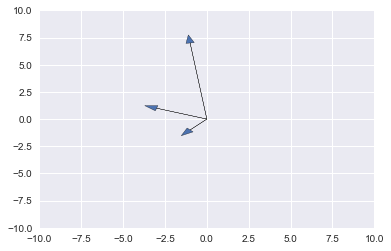

In [56]:
def plot_arrows_2d(vec_2ds, **args):
    for vec_2d in vec_2ds:
        plt.arrow(0, 0, vec_2d[0], vec_2d[1], head_width = 0.5, **args)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

def svm2(s, v):
    return [s * v_i for v_i in v]

v = [-1, 3]
u = [0, 4]
plot_arrows_2d([add2(v, u), add2(v, svm2(-1, u)), add2(svm2(3, v), svm2(-2, u))])

**Problem 2.14.2:** Given the vectors $\boldsymbol{v} = [2, -1, 4]$ and $\boldsymbol{u} = [-1, 1, 1]$, find the vectors $\boldsymbol{v} + \boldsymbol{u}$, $\boldsymbol{v} - \boldsymbol{u}$, $2\boldsymbol{v} - \boldsymbol{u}$, and $\boldsymbol{v} + 2\boldsymbol{u}$.

$\boldsymbol{v} + \boldsymbol{u} = [2, -1, 4] + [-1, 1, 1] = [1, 0, 5]$  
$\boldsymbol{v} - \boldsymbol{u} = [2, -1, 4] - [-1, 1, 1] = [3, -2, 3]$  
$2\boldsymbol{v} - \boldsymbol{u} = 2[2, -1, 4] - [-1, 1, 1] = [4, -2, 8] - [-1, 1, 1] = [5, -3, 7]$  
$\boldsymbol{v} + 2\boldsymbol{u} = [2, -1, 4] + 2[-1, 1, 1] = [2, -1, 4] + [-2, 2, 2] = [0, 1, 6]$

**Problem 2.14.3:** For the vectors $\boldsymbol{v} = [0, one, one]$ and $\boldsymbol{u} = [one, one, one]$ over $GF(2)$, find $\boldsymbol{v} + \boldsymbol{u}$ and $\boldsymbol{v} + \boldsymbol{u} + \boldsymbol{u}$.

$\boldsymbol{v} + \boldsymbol{u} = [0, one, one] + [one, one, one] = [one, 0, 0]$  
$\boldsymbol{v} + \boldsymbol{u} + \boldsymbol{u} = [one, 0, 0] + [one, one, one] = [0, one, one]$

### Expressing one $GF(2)$ vector as a sum of others

**Problem 2.14.4:** Here are six 7-vectors over $GF(2)$:  

||
|-----|
|$\boldsymbol{a}$=1100000|
|$\boldsymbol{b}$=0110000|
|$\boldsymbol{c}$=0011000|
|$\boldsymbol{d}$=0001100|
|$\boldsymbol{e}$=0000110|
|$\boldsymbol{f}$=0000011|

For each of the following vectors $\boldsymbol{u}$, find a subset of the above vectors whose sum is $\boldsymbol{u}$, or report that no such subset exists.  

1. $\boldsymbol{u} = 0010010$
1. $\boldsymbol{u} = 0100010$

1) $\begin{align}
\boldsymbol{u} &= \boldsymbol{c} + \boldsymbol{d} + \boldsymbol{e}\\
\end{align}$

2) $\begin{align}
\boldsymbol{u} &= \boldsymbol{b} + \boldsymbol{c} + \boldsymbol{d} + \boldsymbol{e}\\
\end{align}$

**Problem 2.14.5:** Here are six 7-vectors over $GF(2)$:  

||
|-----|
|$\boldsymbol{a}$=1110000|
|$\boldsymbol{b}$=0111000|
|$\boldsymbol{c}$=0011100|
|$\boldsymbol{d}$=0001110|
|$\boldsymbol{e}$=0000111|
|$\boldsymbol{f}$=0000011|

For each of the following vectors $\boldsymbol{u}$, find a subset of the above vectors whose sum is $\boldsymbol{u}$, or report that no such subset exists.  

1. $\boldsymbol{u} = 0010010$
1. $\boldsymbol{u} = 0100010$

1) $\begin{align}
\boldsymbol{u} &= \boldsymbol{c} + \boldsymbol{d}\\
\end{align}$

2) No such subset exists.

### Finding a solution to linear equations over $GF(2)$

**Problem 2.14.6:** Find a vector $\boldsymbol{x} = [x_1, x_2, x_3, x_4]$ over $GF(2)$ satisfying the following linear equations:  
$1100 \cdot \boldsymbol{x} = 1$  
$1010 \cdot \boldsymbol{x} = 1$  
$1111 \cdot \boldsymbol{x} = 1$  

Show that $\boldsymbol{x} + 1111$ also satisfies the equations.

One vector that satisfies these linear equations is $\boldsymbol{x} = 1000$.  

$1100 \cdot \boldsymbol{x} = 1100 \cdot 1000 = 1+0+0+0=1$  
$1010 \cdot \boldsymbol{x} = 1010 \cdot 1000 = 1+0+0+0=1$  
$1111 \cdot \boldsymbol{x} = 1111 \cdot 1000 = 1+0+0+0=1$  

Show that $\boldsymbol{x} + 1111 = 0111$ also satisfies the equations:  

$1100 \cdot \boldsymbol{x} = 1100 \cdot 0111 = 0+1+0+0=1$  
$1010 \cdot \boldsymbol{x} = 1010 \cdot 0111 = 0+0+1+0=1$  
$1111 \cdot \boldsymbol{x} = 1111 \cdot 0111 = 0+1+1+1=1$ 

### Formulating equations using dot-product

**Problem 2.14.7:** Consider the equations  
$\begin{align}
2x_0 + 3x_1 - 4x_2 + x_3 &= 10\\
x_0 - 5x_1 + 2x_2 + 0x_3 &= 35\\
4x_0 + x_1 - x_2 - x_3 &= 8\\
\end{align}$

Your job is not to solve these equations but to formulate them using dot-product. In particular, come up with three vectors $v_1$, $v_2$, and $v_3$ represented as lists so that the above equations are equivalent to  

$
v_1 \cdot \boldsymbol{x} = 10\\
v_2 \cdot \boldsymbol{x} = 35\\
v_3 \cdot \boldsymbol{x} = 8
$


$v_1 = [2, 3, -4, 1]\\
v_2 = [1, -5, 2, 0]\\
v_3 = [4, 1, -1, -1]
$

### Plotting lines and line segments

**Problem 2.14.8:** Use the `plot` module to plot  
(a) a substantial portion of the line through `[-1.5, 2]` and `[3,0]`, and  
(b) the line segment between `[2, 1]` and `[-2, 2]`.  
For each, provide the Python statements you used and the plot obtained.

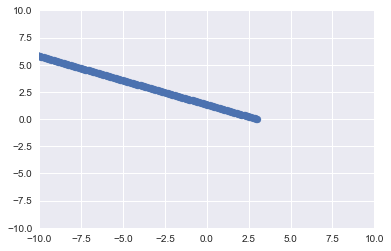

In [57]:
def segment(pt1, pt2, a_range=1):
    return [add2(svm2( (a * a_range) / 200, add2(pt1, svm2(-1, pt2))), pt2) for a in range(201)]
plot_vectors_2d(segment([-1.5, 2], [3, 0], a_range=3), xlim=(-10, 10), ylim=(-10, 10))

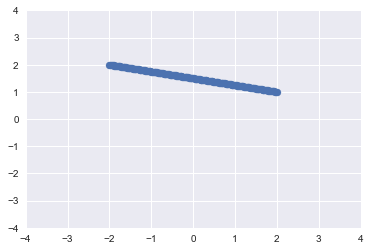

In [58]:
plot_vectors_2d(segment([2, 1], [-2, 2], a_range=1), xlim=(-4, 4), ylim=(-4, 4))

### Practice with dot-product

**Problem 2.14.9:** For each of the following pairs of vectors $\boldsymbol{u}$ and $\boldsymbol{v}$ over $\mathbb{R}$, evaluate the expression $\boldsymbol{u} \cdot \boldsymbol{v}$:

(a) $\boldsymbol{u} = [1, 0], \boldsymbol{v} = [5, 4321]$  
(b) $\boldsymbol{u} = [0, 1], \boldsymbol{v} = [12345, 6]$  
(c) $\boldsymbol{u} = [-1, 3], \boldsymbol{v} = [5, 7]$  
(d) $\boldsymbol{u} = [-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}], \boldsymbol{v} = [\frac{\sqrt{2}}{2}, -\frac{\sqrt{2}}{2}]$

(a) $[1, 0] \cdot [5, 4321] = 5 + 0 = 5$  
(b) $[0, 1] \cdot [12345, 6] = 0 + 6 = 6$  
(c) $[-1, 3] \cdot [5, 7] = -5 + 21 = 16$  
(d) $[-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}] \cdot [\frac{\sqrt{2}}{2}, -\frac{\sqrt{2}}{2}] = -\frac{1}{2} - \frac{1}{2} = -1$

### Writing procedures for the `Vec` class

**Problem 2.14.10:** Download the file `vec.py` to your computer, and edit it.  Fill in the procedure definitions and test the doctests with  
`python3 -m doctest vec.py`.

In [62]:
! python3 -m doctest vec.py

Notice there is no output for the doctest. That means success!